<ipython-input-94-7bc9b62c0124>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=titanic_data, palette='coolwarm')


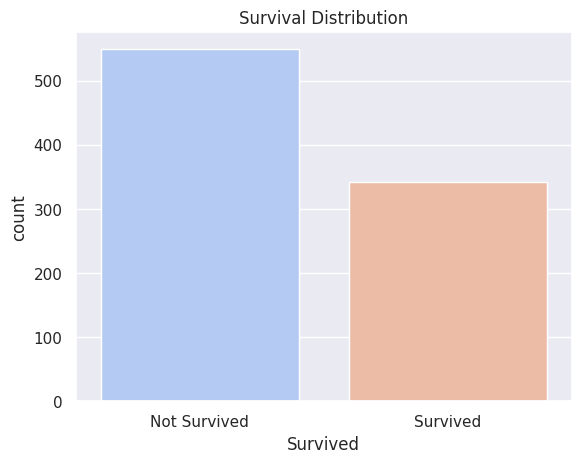

<ipython-input-94-7bc9b62c0124>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='Survived', data=titanic_data, palette='viridis')


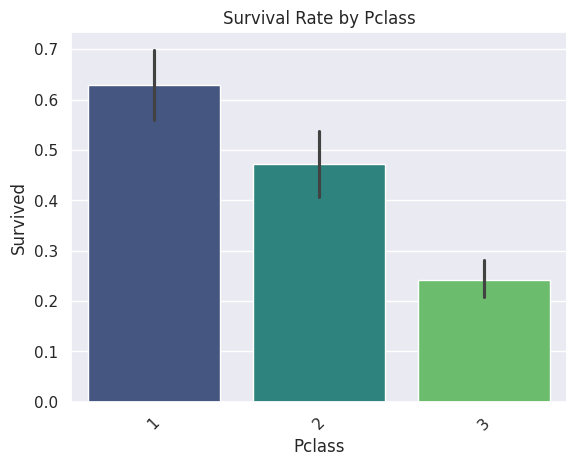

<ipython-input-94-7bc9b62c0124>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='Survived', data=titanic_data, palette='viridis')


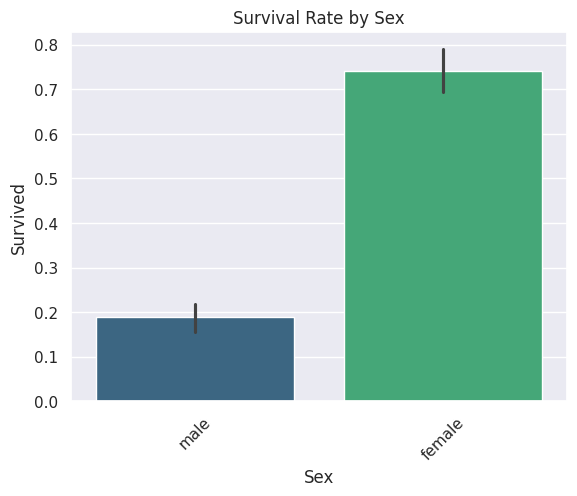

<ipython-input-94-7bc9b62c0124>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='Survived', data=titanic_data, palette='viridis')


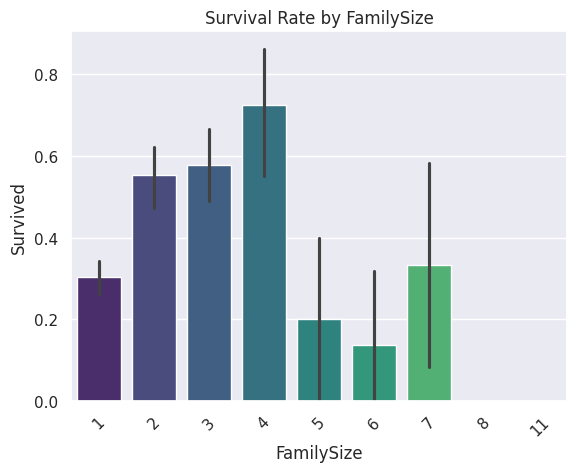

<ipython-input-94-7bc9b62c0124>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='Survived', data=titanic_data, palette='viridis')


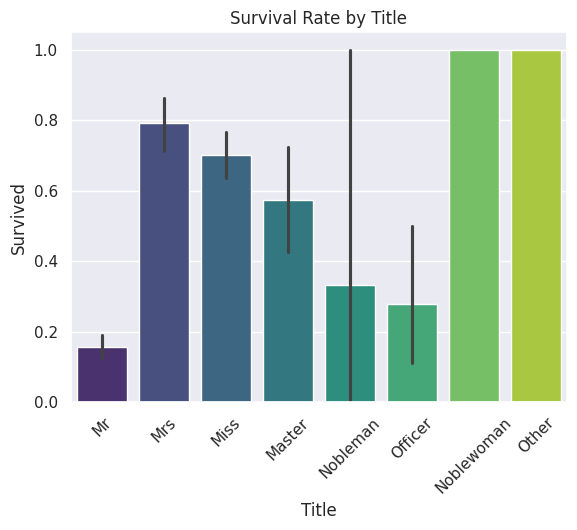

<ipython-input-94-7bc9b62c0124>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='Survived', data=titanic_data, palette='viridis')


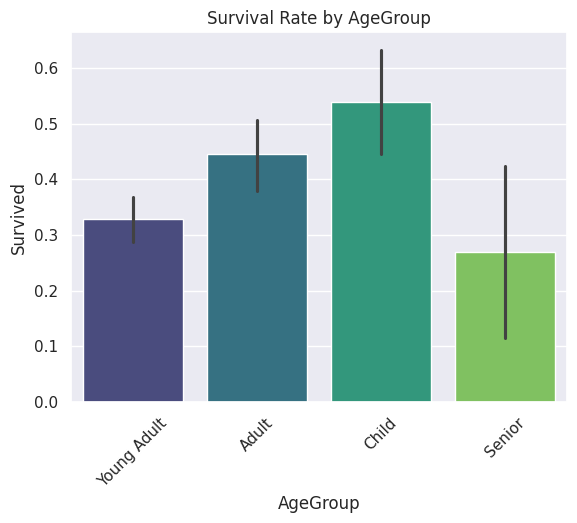

<ipython-input-94-7bc9b62c0124>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[sorted_indices], y=feature_names[sorted_indices], palette='mako')


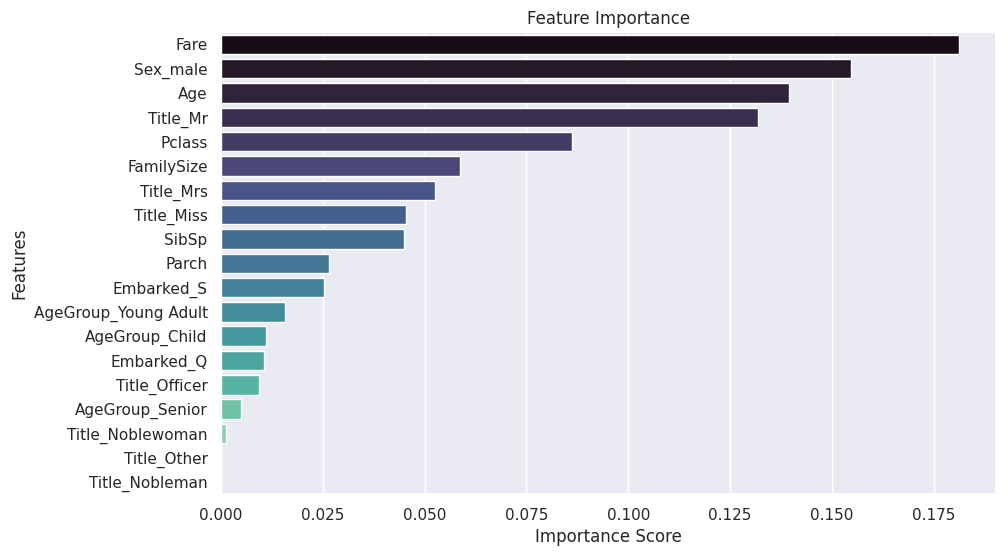

Accuracy: 0.8379888268156425

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       105
           1       0.82      0.78      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

titanic_data = pd.read_csv("Titanic-Dataset.csv")

def extract_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    return 'Unknown'

def map_title(title):
    if title in ['Capt', 'Col', 'Major', 'Dr', 'Rev']:
        return 'Officer'
    elif title in ['Don', 'Sir', 'Jonkheer']:
        return 'Nobleman'
    elif title in ['Lady', 'Mme', 'Ms', 'Countess', 'Dona']:
        return 'Noblewoman'
    elif title in ['Mlle', 'Miss']:
        return 'Miss'
    elif title == 'Mrs':
        return 'Mrs'
    elif title == 'Mr':
        return 'Mr'
    elif title == 'Master':
        return 'Master'
    return 'Other'

titanic_data['Title'] = titanic_data['Name'].apply(extract_title).apply(map_title)
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

def age_group(age):
    if age < 18:
        return 'Child'
    elif age < 35:
        return 'Young Adult'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data.groupby('Title')['Age'].transform('median'))
titanic_data['AgeGroup'] = titanic_data['Age'].apply(age_group)
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])
titanic_data['Fare'] = titanic_data['Fare'].fillna(titanic_data.groupby('Pclass')['Fare'].transform('median'))
titanic_data = titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

titanic_data_encoded = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked', 'Title', 'AgeGroup'], drop_first=True)
X = titanic_data_encoded.drop('Survived', axis=1)
y = titanic_data_encoded['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

sns.countplot(x='Survived', data=titanic_data, palette='coolwarm')
plt.title('Survival Distribution')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

features = ['Pclass', 'Sex', 'FamilySize', 'Title', 'AgeGroup']
for feature in features:
    sns.barplot(x=feature, y='Survived', data=titanic_data, palette='viridis')
    plt.title(f'Survival Rate by {feature}')
    plt.xticks(rotation=45)
    plt.show()

importances = rf_model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
sns.barplot(x=importances[sorted_indices], y=feature_names[sorted_indices], palette='mako')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
